### Measuring the correlation between categorical variables Provider Tenure and  Medication Given

This notebook analyzes and describes relationship that exists( or not) between provider tenure and EMS treatment(Medication Given) to the patient. The script reads the intermediate dataset -- 'MedicationsPatients' preapared by our team based on datasets provided by our project partner.

Initially, in this classification situation, catogorical target variable 'Medication_Given' and categorical predicator 'Provider's Tenure'(in months & years), are analyzed and the strength of relationship between them is measured using <B>Chi-square test<B>.
    
Then the more details analysis of the relationship between provider's tenure and Medication Given is done including various graphical/visual representations

<b>Chi-square Test of Independence:<b>
<p>The chi-square test of independence is used to determine whether there is an association between two or more categorical variables. In our case, we would like to test whether the Tenure of the provider has any association with Medication they administered.

##### This note book uses Intermediate Datasets -- MedicationsPatients for analytics

In [1]:
# import the libraries needed
import pandas as pd
import numpy as np
import os, time

# Used for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(os.getcwd())
readStart=time.time()

## Reading dataset
columnsToUse=['PatientId','PatientGender','PatientGenderCode',
            'FRDPersonnelID','FRDPersonnelGender','ProviderGenderCode',
            'Medication_Given_RXCUI_Code','Medication_Given_Description','TenureMonths','DispatchTime', 'FRDPersonnelStartDate']

dfMedPatient = pd.read_csv ('../data/02_intermediate/MedicationsPatients-20210225-ems-raw-v04.csv',usecols=columnsToUse)[columnsToUse]

# Stop the clock and calculate read time
readStop=time.time()
readTime=readStop-readStart
readMin=np.floor(readTime/60)
readSec=np.floor(readTime-(readMin*60))
print("The file was read in {0:.0f} minutes and {1:.0f} seconds.".format(readMin,readSec))

print(dfMedPatient.shape)

c:\github_anup\ems-analytics\notebooks
The file was read in 0 minutes and 0 seconds.
(62881, 11)


In [3]:
# list the columns in the dataframe
dfMedPatient.columns

Index(['PatientId', 'PatientGender', 'PatientGenderCode', 'FRDPersonnelID',
       'FRDPersonnelGender', 'ProviderGenderCode',
       'Medication_Given_RXCUI_Code', 'Medication_Given_Description',
       'TenureMonths', 'DispatchTime', 'FRDPersonnelStartDate'],
      dtype='object')

In [4]:
#Confirming Given Medication Names
##print('Medication Given( Unique ) =\n '+str(dfMedPatient.Medication_Given_Description.unique()))

In [5]:
#Checking Medication Given Description count
print('Medication Given Description Count = '+str(dfMedPatient.Medication_Given_Description.nunique()))
##dfMedPatient.Medication_Given_Description.nunique()

Medication Given Description Count = 32


In [6]:
dfMedPatient["Medication_Given_Description"].value_counts()

Oxygen                                  10707
Normal saline                            7552
Ondansetron (Zofran)                     6855
Fentanyl Citrate (Sublimaze)             6577
Epinephrine 0.1 MG/ML (1:10,000)         6189
Acetylsalicylic Acid (Aspirin, ASA)      4349
Albuterol (Ventolin)                     3837
Ipratropium Bromide(Atrovent)            2817
Nitroglycerin                            2721
Naloxone (Narcan)                        2056
Midazolam (Versed)                       1395
Dextrose 10 % (D10)                      1187
Glucose (Oral)                            999
Methylprednisolone (Solu-Medrol)          981
Diphenhydramine (Benadryl)                915
Dextrose 50 % (D50)                       866
Ketamine (Ketalar)                        642
Epinephrine 1 MG/ML (1:1,000)             565
Adenosine (Adenocard)                     393
Atropine (Atropine Sulfate)               313
Amiodarone (Cordarone)                    294
Glucagon (Glucagen)               

<b>Add personnel start year and personnel start year_month column to the dataframe</b>

In [7]:
## Adding personnel start year 
dfMedPatient['PersonelStartYear'] = pd.DatetimeIndex(dfMedPatient['FRDPersonnelStartDate']).year

## Adding personnel start year_month
##Note : #if the date is in datetime format, we can also extract the day/month/year using the to_period function  using 'D', 'M', 'Y' as inputs
dfMedPatient['PersonelStartMonthYear'] = pd.to_datetime(dfMedPatient['FRDPersonnelStartDate']).dt.to_period('M')

## Adding MedicationGivenYear 
dfMedPatient['MedicationGivenYear'] = pd.DatetimeIndex(dfMedPatient['DispatchTime']).year

creating output to generate an MedicationDescriptionOrder to be used in plots later.

In [8]:
#Put the value_counts into a dataframe for later use
value_countsMedGiven=dfMedPatient['Medication_Given_Description'].value_counts()
df_MedicationGivenDescription=pd.DataFrame(value_countsMedGiven)
df_MedicationGivenDescription.reset_index(inplace=True)
df_MedicationGivenDescription.columns=["Medication_Given_Description","Count"]
df_MedicationGivenDescription.set_index(keys=["Medication_Given_Description"])
df_MedicationGivenDescription

,Medication_Given_Description,Count
0,Oxygen,10707
1,Normal saline,7552
2,Ondansetron (Zofran),6855
3,Fentanyl Citrate (Sublimaze),6577
4,"Epinephrine 0.1 MG/ML (1:10,000)",6189
5,"Acetylsalicylic Acid (Aspirin, ASA)",4349
6,Albuterol (Ventolin),3837
7,Ipratropium Bromide(Atrovent),2817
8,Nitroglycerin,2721
9,Naloxone (Narcan),2056


In [9]:
#Create the MedicationGivenOrder array from the newly created dataframe
MedicationGivenOrder=np.array(df_MedicationGivenDescription["Medication_Given_Description"])
MedicationGivenOrder

array(['Oxygen', 'Normal saline', 'Ondansetron (Zofran)',
       'Fentanyl Citrate (Sublimaze) ',
       'Epinephrine 0.1 MG/ML (1:10,000)',
       'Acetylsalicylic Acid (Aspirin, ASA) ', 'Albuterol (Ventolin) ',
       'Ipratropium Bromide(Atrovent)', 'Nitroglycerin',
       'Naloxone (Narcan)', 'Midazolam (Versed)', 'Dextrose 10 % (D10)',
       'Glucose (Oral)', 'Methylprednisolone (Solu-Medrol) ',
       'Diphenhydramine (Benadryl)', 'Dextrose 50 % (D50)',
       'Ketamine (Ketalar)', 'Epinephrine 1 MG/ML (1:1,000)',
       'Adenosine (Adenocard)', 'Atropine (Atropine Sulfate) ',
       'Amiodarone (Cordarone)', 'Glucagon (Glucagen)',
       'Magnesium Sulfate (50%) ', 'Sodium Bicarbonate (8.4%) ',
       'Tranexamic Acid (TXA)', 'Lidocaine (2%) (Xylocaine) ',
       'Morphine (Morphine Sulfate) ', 'Norepinephrine (Levophed)',
       'Calcium Chloride (10%) ', 'Tetracaine',
       'Cyanokit (Hydroxocobalamin)',
       'Sodium Bicarbonate (4.2%) (Infant)'], dtype=object)

In [10]:
#Confirming unique Medication_Given_RXCUI_Code count
print('Medication_Given_RXCUI_Code Count = '+str(dfMedPatient.Medication_Given_RXCUI_Code.nunique()))

Medication_Given_RXCUI_Code Count = 32


Removing 'Oxygen' and 'Normal saline' from 'MedicationGivenOrder' array for later sorting /indexing purpose


In [11]:
#Removing MedicationGivenOrder 'Oxygen' and 'Normal saline' from 'MedicationGivenOrder' numpy array using 'numpy.delete(array, index)'

## index : 0='Oxygen' ; 1 ='Normal saline'
index = [0, 1]
MedicationGivenOrderWithoutOxySaline= np.delete(MedicationGivenOrder,index)
MedicationGivenOrderWithoutOxySaline

array(['Ondansetron (Zofran)', 'Fentanyl Citrate (Sublimaze) ',
       'Epinephrine 0.1 MG/ML (1:10,000)',
       'Acetylsalicylic Acid (Aspirin, ASA) ', 'Albuterol (Ventolin) ',
       'Ipratropium Bromide(Atrovent)', 'Nitroglycerin',
       'Naloxone (Narcan)', 'Midazolam (Versed)', 'Dextrose 10 % (D10)',
       'Glucose (Oral)', 'Methylprednisolone (Solu-Medrol) ',
       'Diphenhydramine (Benadryl)', 'Dextrose 50 % (D50)',
       'Ketamine (Ketalar)', 'Epinephrine 1 MG/ML (1:1,000)',
       'Adenosine (Adenocard)', 'Atropine (Atropine Sulfate) ',
       'Amiodarone (Cordarone)', 'Glucagon (Glucagen)',
       'Magnesium Sulfate (50%) ', 'Sodium Bicarbonate (8.4%) ',
       'Tranexamic Acid (TXA)', 'Lidocaine (2%) (Xylocaine) ',
       'Morphine (Morphine Sulfate) ', 'Norepinephrine (Levophed)',
       'Calcium Chloride (10%) ', 'Tetracaine',
       'Cyanokit (Hydroxocobalamin)',
       'Sodium Bicarbonate (4.2%) (Infant)'], dtype=object)

Confirmed that the unique Medication_Given_Description coun matches the Medication_Given_RXCUI_Code count of <b>32.</b>

In [12]:
#Confirming Tenure Months(unique) in sorted order
print('Tenure Months list =\n '+str(dfMedPatient.TenureMonths.sort_values().unique()))
##dfMedPatient.TenureMonths.sort_values().unique()

Tenure Months list =
 [-20 -11   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 

In [13]:
#Show number of unique values per column
dfMedPatient.nunique(dropna=False)

PatientId                       38389
PatientGender                       4
PatientGenderCode                   4
FRDPersonnelID                    844
FRDPersonnelGender                  2
ProviderGenderCode                  2
Medication_Given_RXCUI_Code        33
Medication_Given_Description       33
TenureMonths                      420
DispatchTime                    38383
FRDPersonnelStartDate             166
PersonelStartYear                  38
PersonelStartMonthYear            143
MedicationGivenYear                 4
dtype: int64

In [14]:
#Show number of nulls per column
dfMedPatient.isnull().sum()

PatientId                        0
PatientGender                   32
PatientGenderCode                0
FRDPersonnelID                   0
FRDPersonnelGender               0
ProviderGenderCode               0
Medication_Given_RXCUI_Code      6
Medication_Given_Description     6
TenureMonths                     0
DispatchTime                     0
FRDPersonnelStartDate            0
PersonelStartYear                0
PersonelStartMonthYear           0
MedicationGivenYear              0
dtype: int64

Dispalying Time Traveler - Providers ( TenureMonths in future (<0 months) )

In [15]:
# showing dfMedPatient for those records that have a negative tenure ( time travellers)
dfMedPatient[(dfMedPatient['TenureMonths'] < 0)]

,PatientId,PatientGender,PatientGenderCode,FRDPersonnelID,FRDPersonnelGender,ProviderGenderCode,Medication_Given_RXCUI_Code,Medication_Given_Description,TenureMonths,DispatchTime,FRDPersonnelStartDate,PersonelStartYear,PersonelStartMonthYear,MedicationGivenYear
4207,547276,Male,2,6FB584B8-F37D-45E3-8FCC-C820ACF46816,Male,2,7806.0,Oxygen,-20,2018-03-17 10:43:35,2019-12-09,2019,2019-12,2018
16830,754276,Male,2,86D2C99E-9E01-E211-B5F5-78E7D18CFD3C,Female,1,7806.0,Oxygen,-11,2018-11-05 18:55:39,2019-10-29,2019,2019-10,2018


### Reduce Data

Going to drop the "time traveler" (negative tenure) rows

In [16]:
#Remove -ve Tenure for PatientProvider ( Removing time traveller records)
dfMedPatientReduced = dfMedPatient[(dfMedPatient['TenureMonths'] >= 0)]

#Calculate percentage of dataset remaining
ratio=len(dfMedPatientReduced)/len(dfMedPatient)*100
print("%.4f%% remaining!" % ratio)

99.9968% remaining!


<B> Now adding a new column 'TenureYears' for further analytics </b>.Here we simply divide the TenureMonths by 12 and drop the remainder.
Calculation of Tenure in Months results in value that represents number of completed years of service. (e.g. 35 months -> 2 years, 36 months -> 3 years)

In [17]:
dfMedPatientReduced.loc[:,"TenureYears"]=np.floor(dfMedPatientReduced["TenureMonths"]/12)

C:\Users\Anupdh\Anaconda3\envs\emspe\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Anupdh\Anaconda3\envs\emspe\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [18]:
##dfMedPatientReduced.head()

In [19]:
# Cross tabulation between  TenureMonths and Medications from 'dfMedPatientReduced' datarframe  -- Keeping this code line from -cross-validation/checking----
CrosstabResult=pd.crosstab(index=dfMedPatientReduced['TenureMonths'],columns=dfMedPatientReduced['Medication_Given_Description'])
##print(CrosstabResult)

Chi-square Test in Python can be done using the chi2_contingency() function from the scipy.stats module.

In [20]:
# importing the required function
from scipy.stats import chi2_contingency

In [21]:
# Cross tabulation between TenureMonths and Medications from 'dfMedPatientReduced' datarframe 
pd.crosstab(dfMedPatientReduced.Medication_Given_Description,dfMedPatientReduced.TenureMonths)

TenureMonths,3,5,6,7,8,9,10,11,12,13,...,414,415,416,418,419,420,430,436,437,440
Medication_Given_Description,,,,,,,,,,,,,,,,,,,,,
"Acetylsalicylic Acid (Aspirin, ASA)",0,0,6,2,7,3,11,11,6,10,...,0,1,2,0,0,0,0,0,0,0
Adenosine (Adenocard),0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Albuterol (Ventolin),0,0,2,0,1,6,11,14,6,8,...,0,0,0,0,0,0,0,0,0,0
Amiodarone (Cordarone),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Atropine (Atropine Sulfate),0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
Calcium Chloride (10%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cyanokit (Hydroxocobalamin),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dextrose 10 % (D10),0,0,0,1,0,2,2,3,5,2,...,0,0,0,0,0,0,0,0,0,0
Dextrose 50 % (D50),0,0,0,1,0,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0


Chi-square test finds the probability of a Null hypothesis(H0).

 - Assumption(H0): The two variables are NOT related to each other
 - Result of Chi-Sq Test: if the Probability of H0 being True, The two variables are NOT related to each other
<p>It can help us to understand whether both the categorical variables are correlated with each other or not.

In [22]:
## Performing Chi-sq test, to test the association between two variables, using the cross tab sequence
##ChiSquareResult=chi2_contingency(pd.crosstab( dfMedPatientReduced.TenureMonths, dfMedPatientReduced.Medication_Given_Description))
ChiSquareResult=chi2_contingency(pd.crosstab( dfMedPatientReduced.TenureMonths, dfMedPatientReduced.Medication_Given_RXCUI_Code))

In [23]:
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSquare Test is:', ChiSquareResult[1])

The P-Value of the ChiSquare Test is: 4.5781793145246635e-174


As evident, the <b>p-value is less than 0.05 </b>, hence we <b>reject the Null Hypothesis(H0) that the 'TenureMonths' of the Providers are not associated with the 'Medication_Given'</b>

As the P-value came lower than 0.05 in our result, hence H0 will not be accepted, which means the <b>variables 'TenureMonths' and 'Medication_Given' are correlated  to each other</b>. This is based on if two variables are correlated, then the P-value will come very close to zero, which in our case is : <b>4.5781793145246635e-174</b>

<b>Performing Chi-square test with TenureYears values </b>

In [24]:
## Performing Chi-sq test with TenureYears, to test the association between two variables, using the cross tab sequence
ChiSquareResultforTYears=chi2_contingency(pd.crosstab( dfMedPatientReduced.TenureYears, dfMedPatientReduced.Medication_Given_RXCUI_Code))

In [25]:
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSquare Test( Teure Years) is:', ChiSquareResultforTYears[1])

The P-Value of the ChiSquare Test( Teure Years) is: 5.0838214007710575e-96


<b>Now, further investigating relationship between the provider's TenureMonths and Medications Given follows </b>:........

Create a pivot-like dataframe using tenure, Medication Code and  Medication Description to get a Medication Given count break down by tenure and medication.

In [26]:
## Creating pivot dataframe from'dfMedPatientReduced' 
dfMedPatientReduced_pvt = dfMedPatientReduced.groupby(['TenureMonths','TenureYears',
                                    'Medication_Given_RXCUI_Code',
                                    'Medication_Given_Description']).size().to_frame(name='Medication_Count').reset_index()

dfMedPatientReduced_pvt.shape

(6416, 5)

<b>What are the top 10 Medication Given overall? </b>

In [27]:
dfMedPatientReduced_pvt.groupby(['Medication_Given_RXCUI_Code',
                          'Medication_Given_Description'])[['Medication_Count']].sum().nlargest(10,['Medication_Count'])

,,Medication_Count
Medication_Given_RXCUI_Code,Medication_Given_Description,
7806.0,Oxygen,10705
125464.0,Normal saline,7552
26225.0,Ondansetron (Zofran),6855
4337.0,Fentanyl Citrate (Sublimaze),6577
317361.0,"Epinephrine 0.1 MG/ML (1:10,000)",6189
1191.0,"Acetylsalicylic Acid (Aspirin, ASA)",4349
435.0,Albuterol (Ventolin),3837
7213.0,Ipratropium Bromide(Atrovent),2817
4917.0,Nitroglycerin,2721


<b> Removing data where Medication_Given_Description = 'Oxygen' and 'Normal saline' from dfMedPatientReduced dataframe, before 2nd round of Chi-Square Test  </b>

In [28]:
#Remove 'oxygen' for 'Medication_Given_Description'
dfMedPatientReduced_NoOxy=dfMedPatientReduced.loc[dfMedPatientReduced['Medication_Given_Description']!='Oxygen',:]

#size of remaining dataset 
len(dfMedPatientReduced_NoOxy)

52174

In [29]:
#Remove 'Normal saline' for 'Medication_Given_Description'
dfMedPatientReduced_NoOxySaline=dfMedPatientReduced_NoOxy.loc[dfMedPatientReduced_NoOxy['Medication_Given_Description']!='Normal saline',:]

#size of remaining dataset 
len(dfMedPatientReduced_NoOxySaline)

44622

In [30]:
# Now again creating Cross tabulation between TenureYears(this time) and Medications from 'dfMedPatientReduced_NoOxySaline' datarframe 
pd.crosstab(dfMedPatientReduced_NoOxySaline.Medication_Given_Description,dfMedPatientReduced_NoOxySaline.TenureYears)

TenureYears,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0
Medication_Given_Description,,,,,,,,,,,,,,,,,,,,,
"Acetylsalicylic Acid (Aspirin, ASA)",40,188,313,450,460,364,335,247,213,152,...,11,26,26,11,8,11,8,5,0,0
Adenosine (Adenocard),1,14,28,48,41,26,34,39,17,9,...,0,4,4,0,2,0,0,0,0,0
Albuterol (Ventolin),34,146,297,426,453,346,325,196,155,124,...,23,21,24,5,11,10,2,2,0,0
Amiodarone (Cordarone),0,9,34,32,26,30,20,16,18,2,...,1,3,2,1,1,1,0,0,0,0
Atropine (Atropine Sulfate),0,9,36,34,34,26,27,19,7,24,...,1,2,0,0,0,1,0,0,0,0
Calcium Chloride (10%),0,2,0,0,1,4,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Cyanokit (Hydroxocobalamin),0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Dextrose 10 % (D10),8,46,104,120,142,117,87,66,52,45,...,2,6,14,4,0,2,0,4,0,0
Dextrose 50 % (D50),5,37,69,79,81,68,79,53,41,34,...,8,5,2,1,0,1,1,0,0,0


In [31]:
## Now Performing Chi-sq test, without 'oxygen' and 'Normal saline' and 'TenureYears' to test the association between two variables, using the cross tab sequence
ChiSquareResult_NoOxySaline=chi2_contingency(pd.crosstab(dfMedPatientReduced_NoOxySaline.TenureYears, dfMedPatientReduced_NoOxySaline.Medication_Given_Description))

In [32]:
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSquare Test is:', ChiSquareResult_NoOxySaline[1])

The P-Value of the ChiSquare Test is: 4.2379433785693913e-41


Again, we see the <b>p-value is less than 0.05 </b>, hence we <b>reject the Null Hypothesis(H0) that the 'TenureMonths' of the Providers are not associated with the 'Medication_Given'</b>

<b>Using dfMedPatientReduced_pvt for further analysis</b>

In [33]:
## Changing 'Medication_Given_RXCUI_Code' from Numerical(float) to int64 for consistency
dfMedPatientReduced_pvt['Medication_Given_RXCUI_Code'] = dfMedPatientReduced_pvt['Medication_Given_RXCUI_Code'].apply(np.int64) 

In [34]:
#Create the MedicationOrder array from the dataframe
MedicationOrder=np.array(dfMedPatientReduced["Medication_Given_Description"])
MedicationOrder

array(['Oxygen', 'Ondansetron (Zofran)', 'Normal saline', ..., 'Oxygen',
       'Ondansetron (Zofran)', 'Fentanyl Citrate (Sublimaze) '],
      dtype=object)

In [35]:
## Lowest 3 tenure months Medication given, count break down by tenuremonths
dfMedPatientReduced_pvt.head(3)

,TenureMonths,TenureYears,Medication_Given_RXCUI_Code,Medication_Given_Description,Medication_Count
0,3,0.0,7806,Oxygen,1
1,5,0.0,7242,Naloxone (Narcan),1
2,5,0.0,7806,Oxygen,5


In [36]:
## Top 3 tenuremonths for Medication given, count break down by tenuremonths
dfMedPatientReduced_pvt.tail(3)

,TenureMonths,TenureYears,Medication_Given_RXCUI_Code,Medication_Given_Description,Medication_Count
6413,436,36.0,7242,Naloxone (Narcan),2
6414,437,36.0,4337,Fentanyl Citrate (Sublimaze),1
6415,440,36.0,7806,Oxygen,1


Generate a hex bin plot using tenure, medication given code, and medication count from dfMedPatient_pvt as the x, y and C values, respectively.

<function matplotlib.pyplot.show(close=None, block=None)>

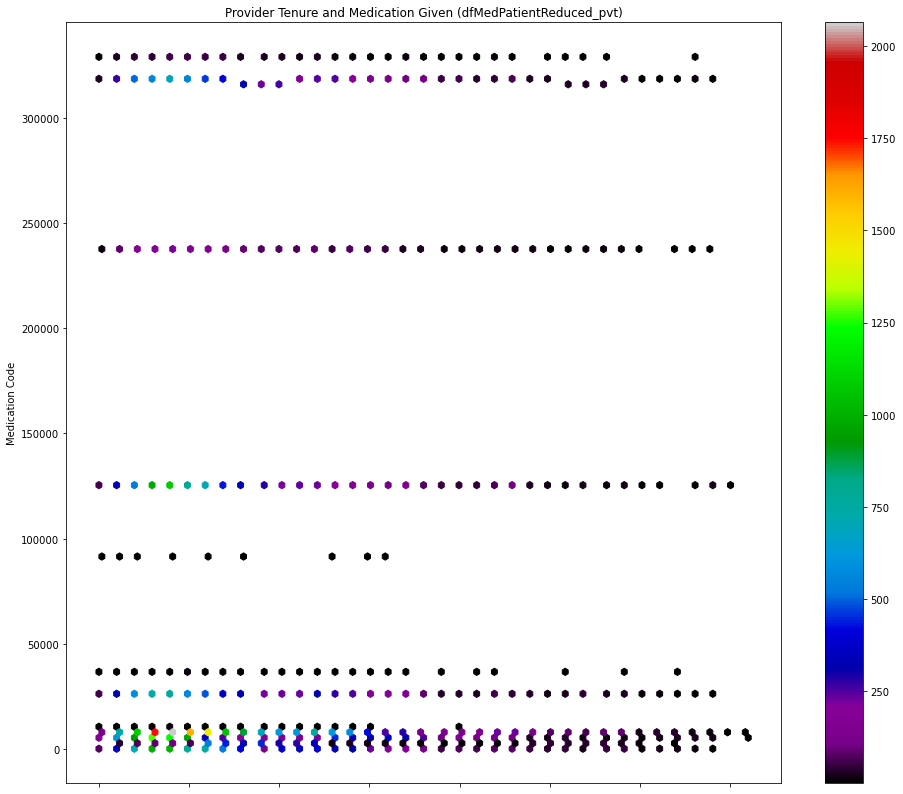

In [37]:
# in order to get the medication given code to show in the y-axis, need to format the values as strings instead of numbers
hb = dfMedPatientReduced_pvt.plot.hexbin(
                       x='TenureYears', 
                       y='Medication_Given_RXCUI_Code', 
                       C='Medication_Count',
                       reduce_C_function=np.sum,
                       gridsize=110,
                       cmap="nipy_spectral",
                       xlabel="Provider Tenure(Years)",
                       ylabel="Medication Code",
                       title="Provider Tenure and Medication Given (dfMedPatientReduced_pvt)",
                       figsize=(16,14)
                       ##sharex=False
)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:.0f}'))
plt.show

The hex bin plots of dfMedPatientReduced_pvt shows the use of 3 attributes from the dataframe. Using x, y, and C means that the reduce_C_function now comes into play and it is the reason for all of the white showing - it is where there is no sum to show.

Using dfMedPatientReduced_pvt, generate descriptive statistics about the tenure, medicine count, and medication given description attributes.

In [38]:
dfMedPatientReduced_pvt[['TenureYears','Medication_Count']].describe()

,TenureYears,Medication_Count
count,6416.000000,6416.000000
mean,13.373753,9.799408
std,8.793604,14.871184
min,0.000000,1.000000
25%,6.000000,2.000000
50%,12.000000,4.000000
75%,20.000000,11.000000
max,36.000000,130.000000


C:\Users\Anupdh\Anaconda3\envs\emspe\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


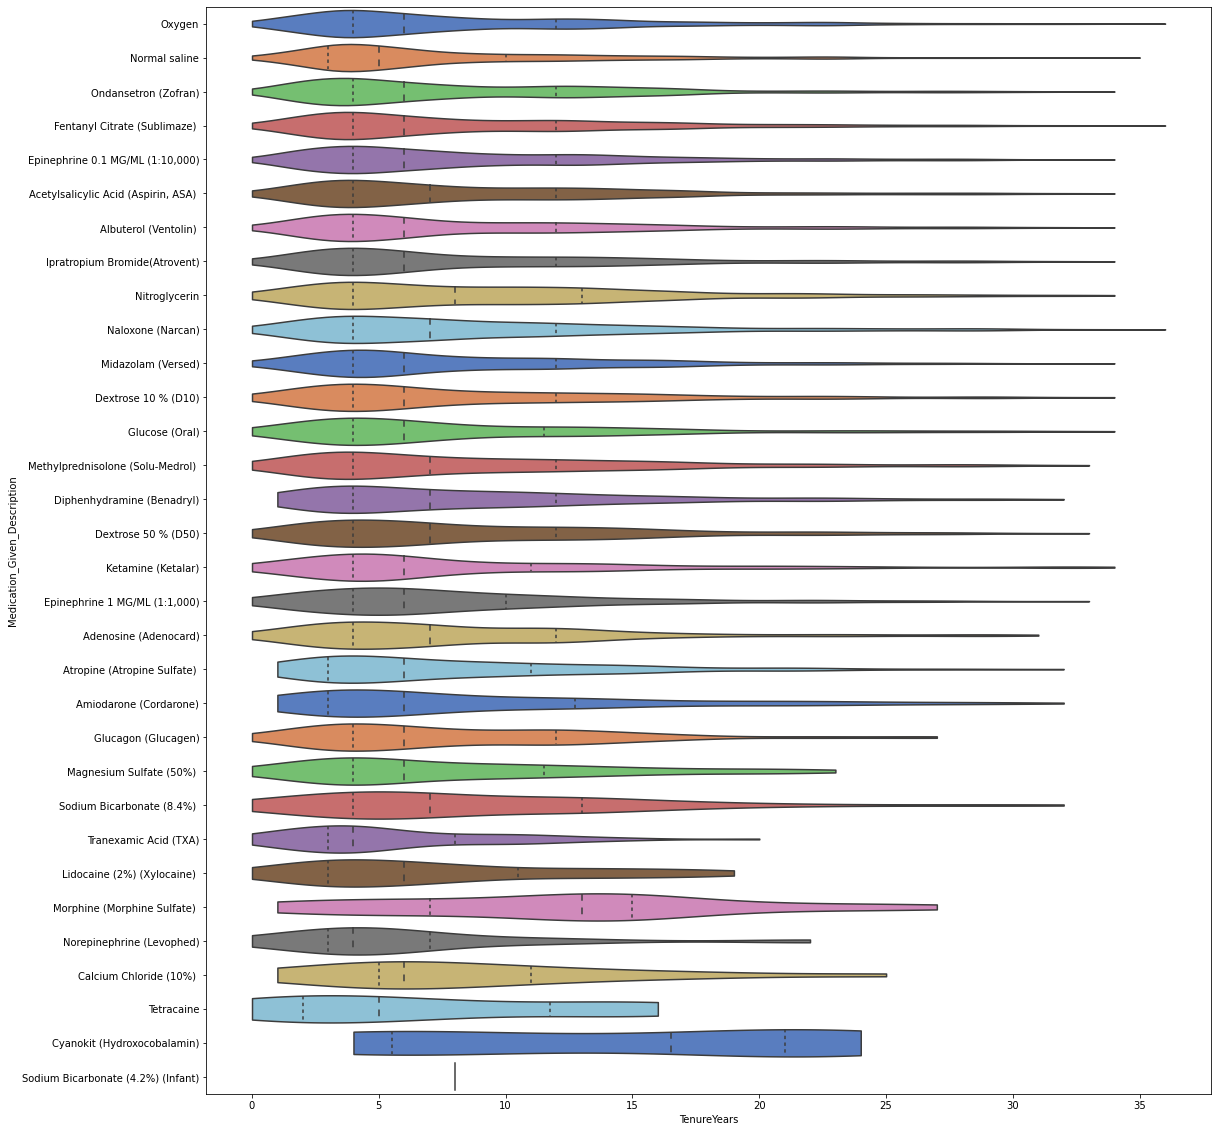

In [39]:
plt.figure(figsize=(18,20))
##sns.set_theme(style="whitegrid")
sns.violinplot("TenureYears","Medication_Given_Description",
               data=dfMedPatientReduced[dfMedPatientReduced.TenureYears < 40], 
               scale='width',
              order=MedicationGivenOrder, cut=0, palette="muted", inner="quartile");


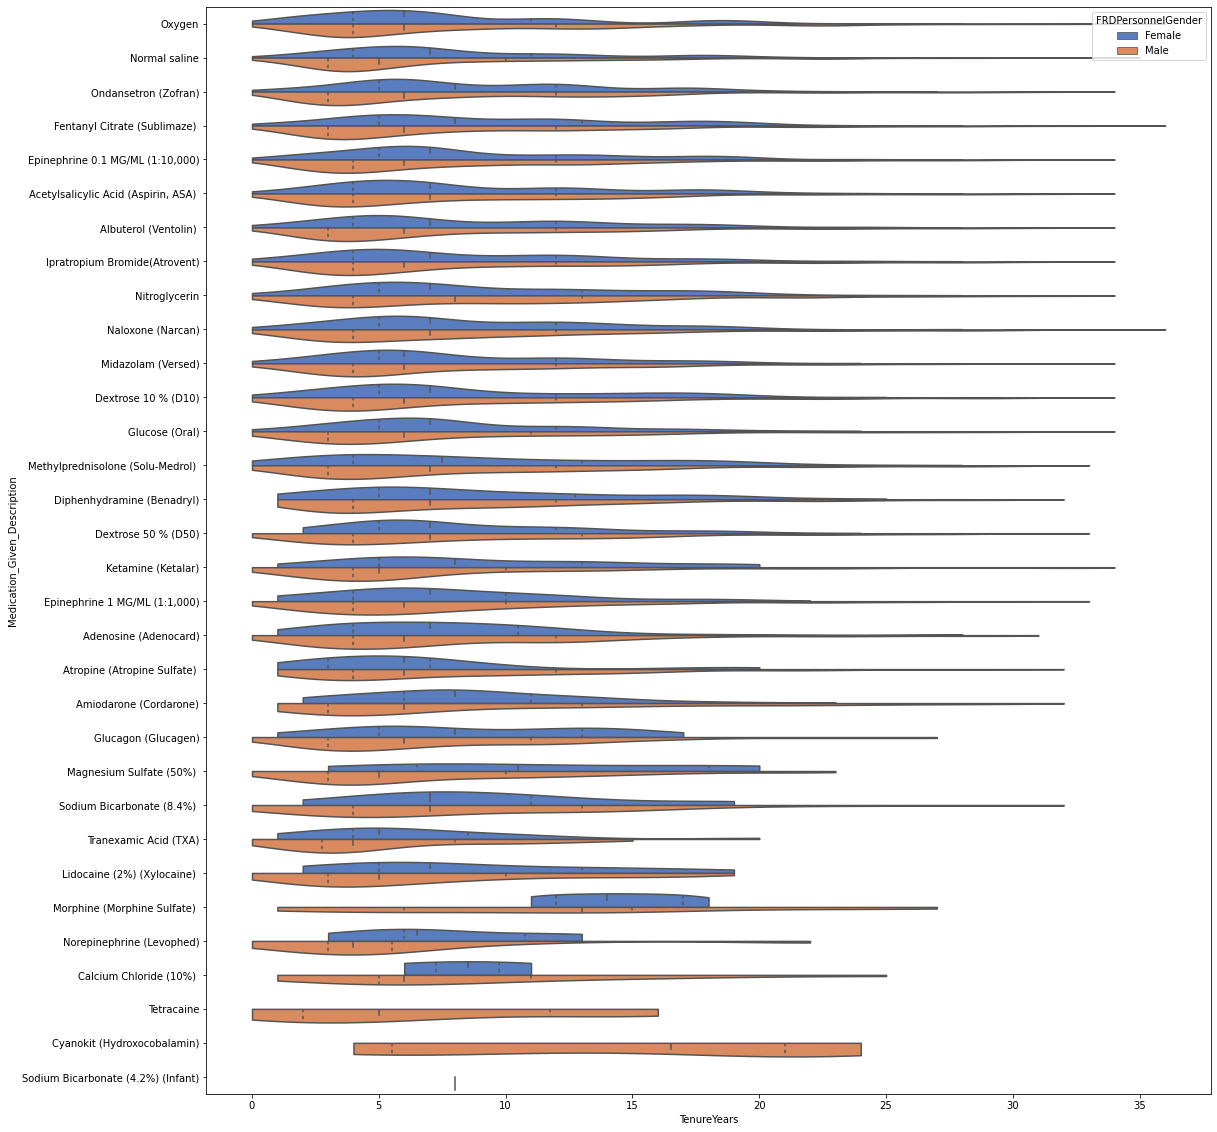

In [40]:
##plt.title('Medication Given vs Tenure Violinplot')
plt.figure(figsize=(18,20))
##sns.set_theme(style="whitegrid")
sns.violinplot(x="TenureYears",y="Medication_Given_Description",
               data=dfMedPatientReduced, hue="FRDPersonnelGender", split=True, dodge =True,
               scale='area',
              order=MedicationGivenOrder, cut=0, palette="muted", inner="quartile", height=15, aspect=.8);

<b>Now, Creating violin plot using dataframe without Generally used medicine 'Oxygen' & 'Normal Saline' with high skewness for comparision</b>

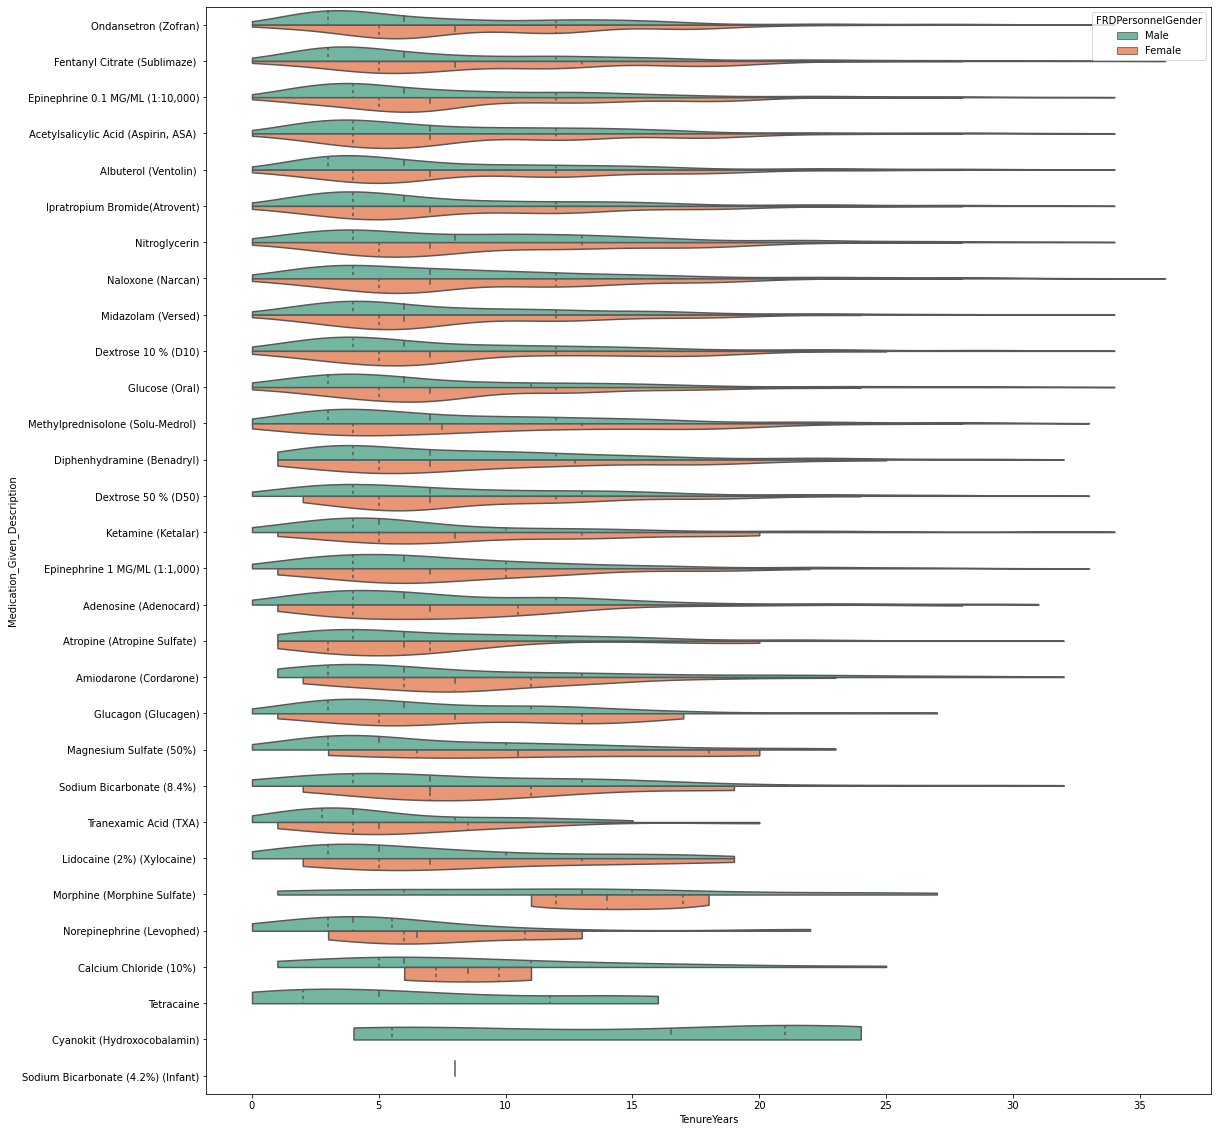

In [41]:
## Using dataframe 'dfMedPatientReduced_NoOxySaline' removing medicine 'Oxygen' & 'Normal Saline' for violin plot 

plt.figure(figsize=(18,20))
##sns.set_theme(style="whitegrid")
sns.violinplot(x="TenureYears",y="Medication_Given_Description",
               data=dfMedPatientReduced_NoOxySaline, hue="FRDPersonnelGender", split=True, dodge =True,
               scale='area',
              order=MedicationGivenOrderWithoutOxySaline, cut=0, palette="Set2", inner="quartile", height=15, aspect=.8);

Now,looking for more details on the data frame

In [42]:
dfMedPatientReduced_pvt[['Medication_Given_Description']].describe(include='all')

,Medication_Given_Description
count,6416
unique,32
top,Oxygen
freq,392


Generate histograms of the tenure and medication given using all records to see frequency from dfMedPatient_pvt

array([[<AxesSubplot:title={'center':'TenureYears'}>]], dtype=object)

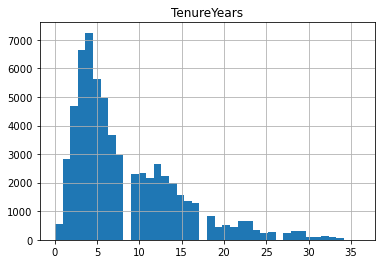

In [43]:
## histogram of the tenure
dfMedPatientReduced.hist(column='TenureYears',bins=40)

Finding the distributions for tenure years of the providers(also gender)

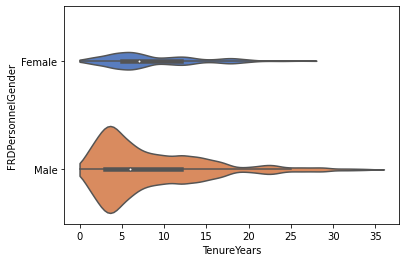

In [44]:
sns.violinplot(x="TenureYears",y="FRDPersonnelGender",
               data=dfMedPatientReduced,
               palette="muted", split=True,
               scale='count', cut=0);

In [45]:
##Barplot of the 'Medication_Given_Description' and total given count
##df_MedicationGivenDescription.plot.barh(x='Medication_Given_Description', y='Count', color='red', align='center', alpha=0.7, figsize=(20,12))

<b>Reviewing distribution of Medication_Given_Description </b>

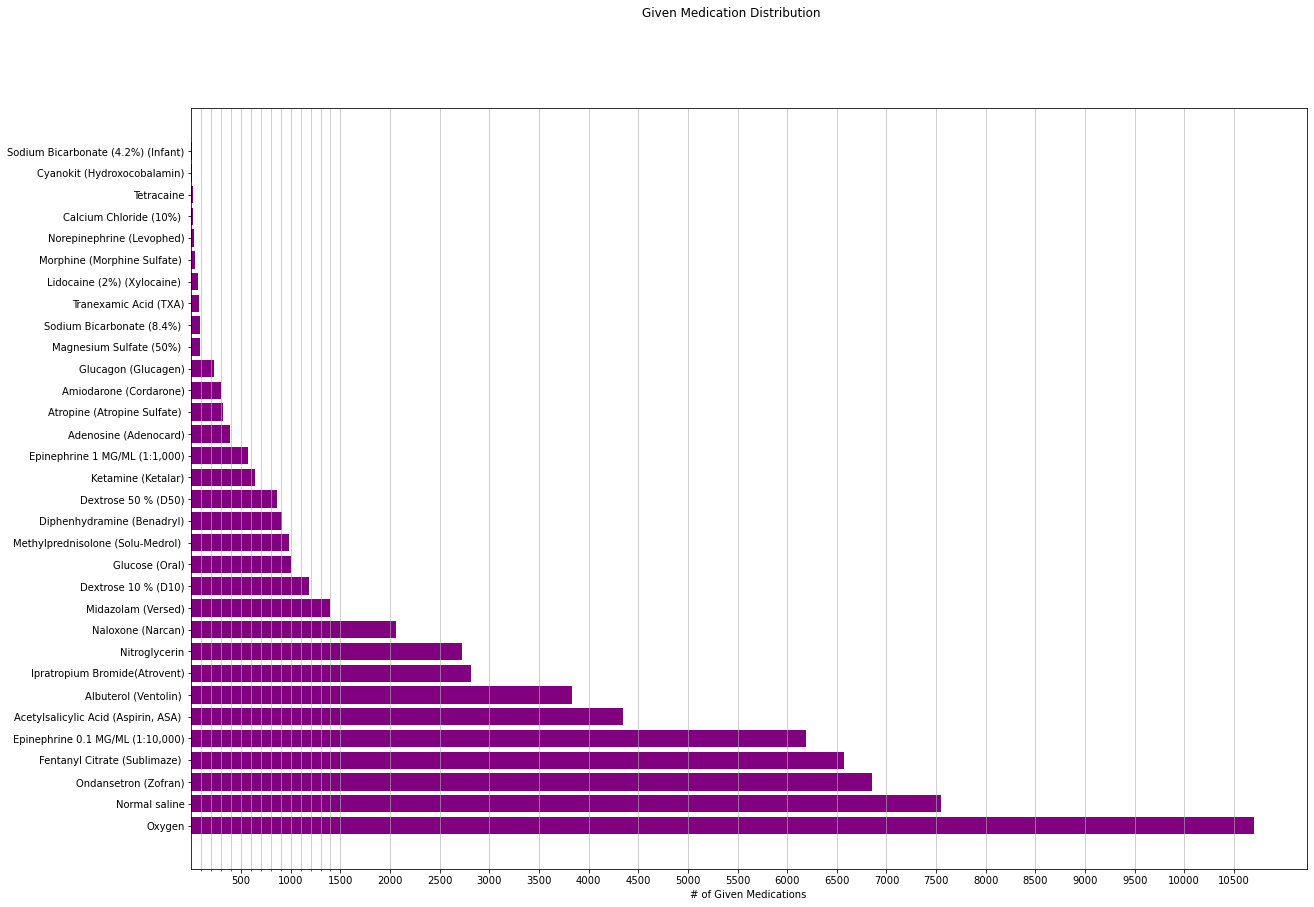

In [46]:
## bar plot for medication given distribution 
fig=plt.figure(figsize=(20,14))
value_counts=dfMedPatientReduced['Medication_Given_Description'].value_counts()
df_GivenMedicationByProviders=pd.DataFrame(value_counts)
df_GivenMedicationByProviders.reset_index(inplace=True)
df_GivenMedicationByProviders.columns=["Medication_Given_Description","Count"]

#Bar chart
ax1=plt.subplot()
ax1.barh(df_GivenMedicationByProviders['Medication_Given_Description'],width=df_GivenMedicationByProviders['Count'],color='purple')
ax1.set_xlabel('# of Given Medications ')
ax1.grid(axis='x', alpha=.75, which='both')

ax1.set_xticks(minor=True, ticks=[100,200,300,400,600,700,800,900,1100, 1200,1300,1400])
ax1.set_xticks(minor=False, ticks=[500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500])
                                  
fig.suptitle('Given Medication Distribution')
plt.show()

array([[<AxesSubplot:title={'center':'Medication_Count'}>]], dtype=object)

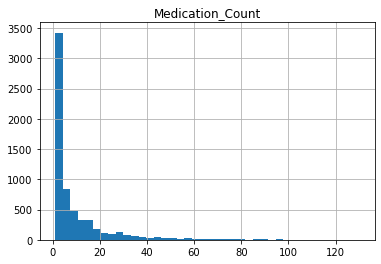

In [47]:
## !! Check, if this is valid !!! histogram of the 'Medication_Count' (by tenure)
dfMedPatientReduced_pvt.hist(column='Medication_Count', bins=40)

Please remember there are some "time traveler" tenure values (2 records) where the porvider start date is after the dispatch date resulting in a negative value for the calculated provider tenure. Those records were removed for analysis.

<b>What are the top 10 Medication Given overall? </b>

In [48]:
dfMedPatientReduced_pvt.groupby(['Medication_Given_RXCUI_Code',
                          'Medication_Given_Description'])[['Medication_Count']].sum().nlargest(10,['Medication_Count'])

,,Medication_Count
Medication_Given_RXCUI_Code,Medication_Given_Description,
7806,Oxygen,10705
125464,Normal saline,7552
26225,Ondansetron (Zofran),6855
4337,Fentanyl Citrate (Sublimaze),6577
317361,"Epinephrine 0.1 MG/ML (1:10,000)",6189
1191,"Acetylsalicylic Acid (Aspirin, ASA)",4349
435,Albuterol (Ventolin),3837
7213,Ipratropium Bromide(Atrovent),2817
4917,Nitroglycerin,2721


Based on the tenure histogram, the highest tenure count  falls between the 0 years (< 1 year) and 20 years value(mean tenure 13.37 years) . Now going to look at provider tenure values less than or equal to 20 years tenure to see what can be found around these "high" range.

In [49]:
# how many records from dfMedPatientReduced_pvt will be used limiting the tenure to 100 months or less
dfMedPatientReduced_pvt[(dfMedPatientReduced_pvt['TenureYears'] <= 20)].shape

(4902, 5)

<b>Generate the respective descriptive statistics and histograms. </b>

In [50]:
dfMedPatientReduced_pvt[(dfMedPatientReduced_pvt['TenureYears'] <= 20)][['TenureYears','TenureMonths','Medication_Count']].describe()

,TenureYears,TenureMonths,Medication_Count
count,4902.000000,4902.000000,4902.000000
mean,9.460628,119.081599,12.006936
std,5.649706,67.743493,16.338529
min,0.000000,3.000000,1.000000
25%,5.000000,60.000000,2.000000
50%,9.000000,116.000000,6.000000
75%,14.000000,175.000000,15.000000
max,20.000000,251.000000,130.000000


In [51]:
dfMedPatientReduced_pvt[(dfMedPatientReduced_pvt['TenureYears'] <= 20)][['Medication_Given_Description']].describe(include='all')

,Medication_Given_Description
count,4902
unique,32
top,Oxygen
freq,248


array([[<AxesSubplot:title={'center':'Medication_Given_RXCUI_Code'}>]],
      dtype=object)

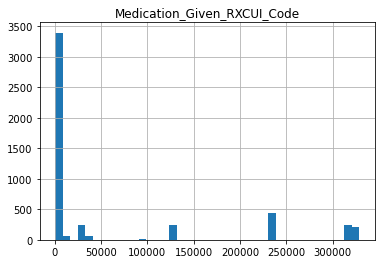

In [52]:
dfMedPatientReduced_pvt[(dfMedPatientReduced_pvt['TenureYears'] <= 20)].hist(column='Medication_Given_RXCUI_Code', bins=40)

A comparison of the medication given histograms for all dfMedPatientReduced_pvt rows and the subset limited to tenure of 20 years or less shows the distribution of medication given is seemingly distributed evenly except for certain medications.

The mean of the tenure values for those providers with 20 years or less, is <b>9.46 </b> years, as seen above earlier.

<b> What are the top 10 procedures by count for medication given by providers with 20 or less years of tenure? </b>

In [53]:
dfMedPatientReduced_pvt[(dfMedPatientReduced_pvt['TenureYears'] <= 20)].groupby(['Medication_Given_RXCUI_Code',
     'Medication_Given_Description'])[['Medication_Count']].sum().nlargest(10,['Medication_Count'])

,,Medication_Count
Medication_Given_RXCUI_Code,Medication_Given_Description,
7806,Oxygen,9943
125464,Normal saline,7171
26225,Ondansetron (Zofran),6477
4337,Fentanyl Citrate (Sublimaze),6131
317361,"Epinephrine 0.1 MG/ML (1:10,000)",5824
1191,"Acetylsalicylic Acid (Aspirin, ASA)",4093
435,Albuterol (Ventolin),3575
7213,Ipratropium Bromide(Atrovent),2611
4917,Nitroglycerin,2497


In [54]:
# create a dataframe for for medication given by providers with 20 or less years of tenure for repeated use in analysis
dfMedPatientReduced_pvt_lte20Yrs= dfMedPatientReduced_pvt[(dfMedPatientReduced_pvt['TenureYears'] <= 20)]
dfMedPatientReduced_pvt_lte20Yrs.shape

(4902, 5)

<b>What are the top 10 procedures by count for procedures performed by providers with more than 20 or more years of tenure? </b>

In [55]:
dfMedPatientReduced_pvt[(dfMedPatientReduced_pvt['TenureYears'] > 20)].groupby(['Medication_Given_RXCUI_Code',
     'Medication_Given_Description'])[['Medication_Count']].sum().nlargest(10,['Medication_Count'])

,,Medication_Count
Medication_Given_RXCUI_Code,Medication_Given_Description,
7806,Oxygen,762
4337,Fentanyl Citrate (Sublimaze),446
125464,Normal saline,381
26225,Ondansetron (Zofran),378
317361,"Epinephrine 0.1 MG/ML (1:10,000)",365
435,Albuterol (Ventolin),262
1191,"Acetylsalicylic Acid (Aspirin, ASA)",256
4917,Nitroglycerin,224
7213,Ipratropium Bromide(Atrovent),206


In [56]:
# create a dataframe for medication given by providers with more than 20 years of tenure for repeated use in analysis
dfMedPatientReduced_pvt_gt20Yrs= dfMedPatientReduced_pvt[(dfMedPatientReduced_pvt['TenureYears'] > 20)]
dfMedPatientReduced_pvt_gt20Yrs.shape

(1514, 5)

<b>Generate the respective descriptive statistics and histograms for medication given by providers with more than 20 years of tenure. </b>

In [57]:
# describe for dataframe dfMedPatientReduced_pvt_gt20Yrs
dfMedPatientReduced_pvt_gt20Yrs[['TenureYears','TenureMonths','Medication_Count']].describe()

,TenureYears,TenureMonths,Medication_Count
count,1514.000000,1514.000000,1514.000000
mean,26.043593,317.861955,2.651915
std,3.771666,45.277438,2.458856
min,21.000000,252.000000,1.000000
25%,23.000000,278.000000,1.000000
50%,26.000000,312.000000,2.000000
75%,29.000000,351.000000,3.000000
max,36.000000,440.000000,19.000000


In [58]:
# describe for 'Medication_Given_Description'
dfMedPatientReduced_pvt_gt20Yrs[['Medication_Given_Description']].describe(include='all')

,Medication_Given_Description
count,1514
unique,28
top,Oxygen
freq,144


The medication histogram for providers with 20 years or less and greater than 20 years continues to display a similar distribution pattern of medication given (even scales are less)

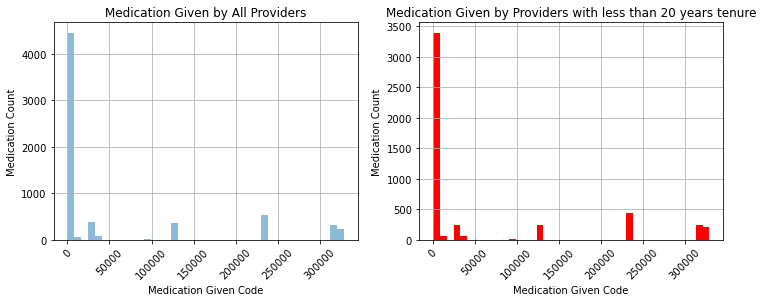

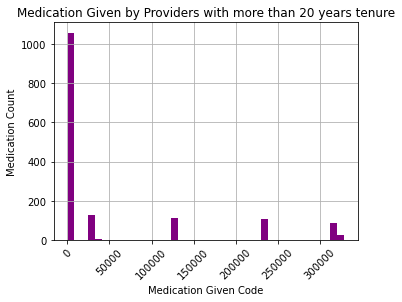

In [59]:
# show procedure histograms from all tenures, tenure < = 20 years and  tenure > 300 years side by side

fig=plt.figure(figsize=(12,4))

# all tenure
ax1=plt.subplot(121)
ax1.hist(x=dfMedPatientReduced_pvt['Medication_Given_RXCUI_Code'],bins= 40, alpha = 0.5)
ax1.set_xlabel('Medication Given Code')
ax1.set_ylabel('Medication Count')
ax1.set_title('Medication Given by All Providers')
ax1.ticklabel_format(style='plain')
ax1.grid()
plt.xticks(rotation=45)

# lte >=20 years tenure
ax2=plt.subplot(122)
ax2.hist(x=dfMedPatientReduced_pvt_lte20Yrs['Medication_Given_RXCUI_Code'], bins=40, color='red')
ax2.set_xlabel('Medication Given Code')
ax2.set_ylabel('Medication Count')
ax2.set_title('Medication Given by Providers with less than 20 years tenure')
ax2.ticklabel_format(style='plain')
ax2.grid()
plt.xticks(rotation=45)

# show the first 2 plots
plt.show()

fig=plt.figure(figsize=(12,4))

# gt > 30 years tenure
ax1=plt.subplot(121)
ax1.hist(x=dfMedPatientReduced_pvt_gt20Yrs['Medication_Given_RXCUI_Code'], bins=40, color='purple')
ax1.set_xlabel('Medication Given Code')
ax1.set_ylabel('Medication Count')
ax1.set_title('Medication Given by Providers with more than 20 years tenure')
ax1.ticklabel_format(style='plain')
ax1.grid()
plt.xticks(rotation=45)

# show all the plots
plt.show()


Now showing the histograms as overlays so thie comparision can be seen  on the same scale

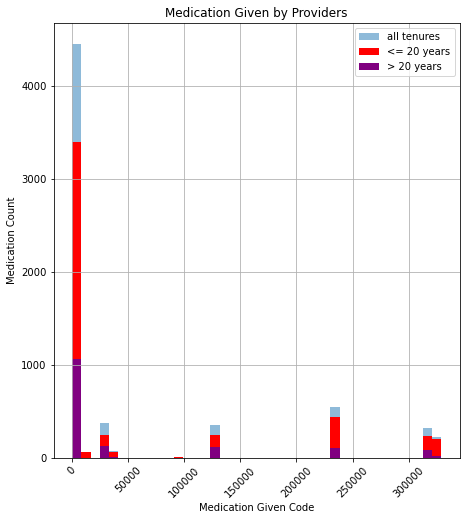

In [60]:
## overlays histograms 
fig=plt.figure(figsize=(16,8))

ax1=plt.subplot(121)
ax1.hist(x=dfMedPatientReduced_pvt['Medication_Given_RXCUI_Code'],bins= 40, alpha = 0.5, label='all tenures')
ax1.hist(x=dfMedPatientReduced_pvt_lte20Yrs['Medication_Given_RXCUI_Code'], bins=40, color='red', label='<= 20 years')
ax1.hist(x=dfMedPatientReduced_pvt_gt20Yrs['Medication_Given_RXCUI_Code'], bins=40, color='purple', label='> 20 years')
ax1.set_xlabel('Medication Given Code')
ax1.set_ylabel('Medication Count')
ax1.set_title('Medication Given by Providers')
ax1.ticklabel_format(style='plain')
ax1.grid()
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


<b>Now looking for the following medications which has adminstered by providers with specific tenures </b>
  (Medication Name    Code     Group)
 - Glucagon (Glucagen)- 4832 - Diabetic
 - Magnesium Sulfate (50%) - 6585 - Severe Asthma/COPD
 - Tranexamic Acid (TXA) - 10691 - Trauma
 - Lidocaine (2%) (Xylocaine) - 6387 - Pain
 - Morphine (Morphine Sulfate) - 7052 - Pain
 - Norepinephrine (Levophed) - 328853 - Hypotension
 - Calcium Chloride (10%) - 1901 - Cardiac
- Tetracaine - 91189 - Eye Pain due to trauma
 - Cyanokit (Hydroxocobalamin) - 5514 - Poisoning



In [61]:
dfMedPatientReduced_Filtered = dfMedPatientReduced[dfMedPatientReduced.Medication_Given_Description.isin(["Glucagon (Glucagen)","Magnesium Sulfate (50%)", "Tranexamic Acid (TXA)", "Lidocaine (2%) (Xylocaine)","Morphine (Morphine Sulfate)", "Norepinephrine (Levophed)","Calcium Chloride (10%)", "Tetracaine","Cyanokit (Hydroxocobalamin)"])]
##dfMedPatientReduced_Filtered.head()

In [62]:
dfMedPatientReduced_Filtered.size

5400

In [63]:
## Creating pivot dataframe from'dfMedPatientReduced' 
dfMedPatientReduced_FilteredPvt = dfMedPatientReduced_Filtered.groupby(['PersonelStartYear','MedicationGivenYear','Medication_Given_RXCUI_Code',
     'Medication_Given_Description']).size().to_frame(name='MedGiven_Count').reset_index()

In [64]:
dfMedPatientReduced_FilteredPvt.size

655

Text(0.5, 1.0, "Medication Administered - by Personnel's Start Year(for filtered 7 medications only)")

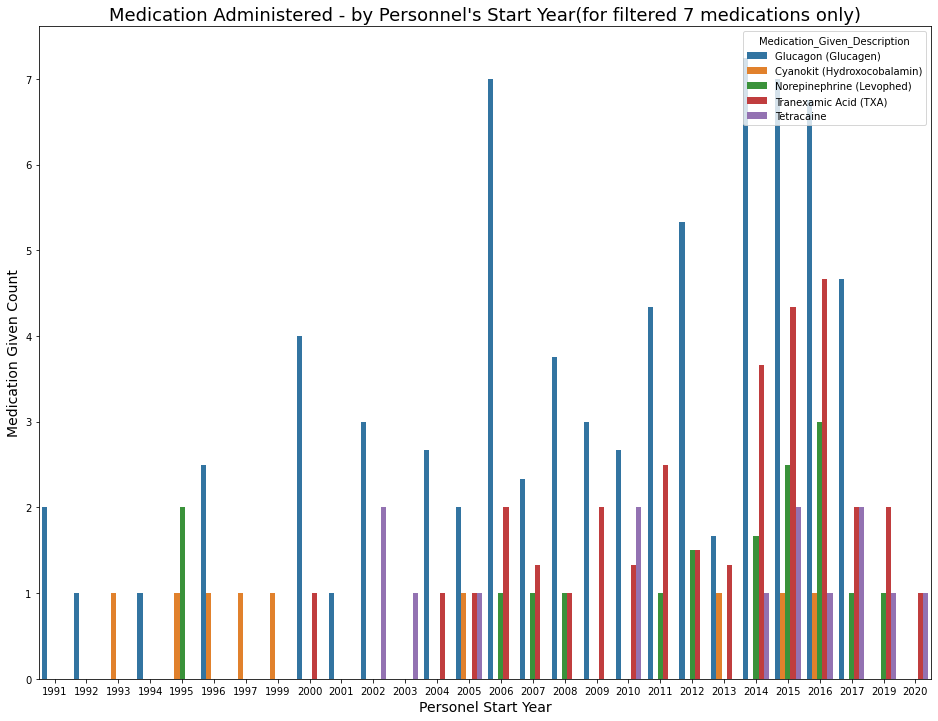

In [65]:
plt.figure(figsize=(16,12))
sns.set_color_codes("pastel")
ax = sns.barplot(y="MedGiven_Count", x="PersonelStartYear",
    data=dfMedPatientReduced_FilteredPvt,
    ci=None, hue= "Medication_Given_Description")
ax.set_xlabel("MedGiven_Count")
plt.ylabel("Medication Given Count", size=14)
plt.xlabel("Personel Start Year", size=14)
plt.title("Medication Administered - by Personnel's Start Year(for filtered 7 medications only)", size=18)
##plt.savefig("barplot_MedicationGiven_byPersonalYear.png")


Find Medication Administered by Medication given Year( for filtered 7 medications only )

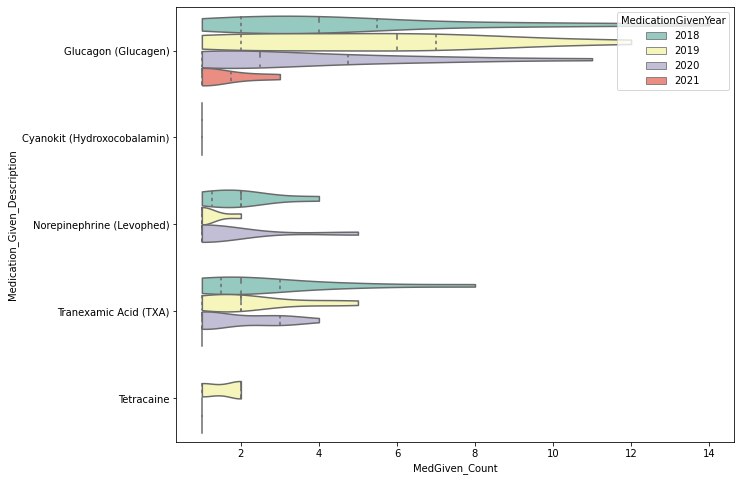

In [66]:
## Using dataframe 'dfMedPatientReduced_FilteredPvt' to see Medication Administered - by Medication given Year using violin plot 

plt.figure(figsize=(10,8))
##sns.set_theme(style="whitegrid")
sns.violinplot(x="MedGiven_Count",y="Medication_Given_Description",
    data=dfMedPatientReduced_FilteredPvt, split=False, dodge =True, hue="MedicationGivenYear",
    scale='width',
    ###order=MedicationGivenOrderWithoutOxySaline, 
    cut=0, palette="Set3", inner="quartile", height=10, aspect=.8);



### Findings
Question: Is there a relationship between category(name) of medication given and the provider tenure?
Answer: There seems to be NO significant indicators of a relationship or anomaly associated with provider tenure and the medication given.

<b>Conclusions / Observations </b>
 - The distribution of medication given is nominally similar across all tenures (by year), with some slight variation.
 - The distribution of tenures (by year) is nominally similar across all medication given, with with some slight variation.
 - These distributions are consistent with the distributions of their underlying factors.
<li><b> More needs to be added ...</b>
